In [84]:
import numpy as np
import torch
import tensorflow as tf
import time
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
w = np.random.rand(1_000_000)
x = np.random.rand(1_000_000)

## 1. With python for loop

In [3]:
%%time
tic = time.time()

for j in range(100):
    z=0
    for i in range(1_000_000):
        z += w[i] * x[i]

toc = time.time()

time_for_loop = (toc - tic) * 10
print(f"For loop: {time_for_loop} ms.")

For loop: 193.084979057312 ms.
CPU times: user 19.3 s, sys: 7.04 ms, total: 19.3 s
Wall time: 19.3 s


## 2. With numpy vectorization

In [15]:
%%time
tic = time.time()

for j in range(100):
    z=0
    z = np.dot(w, x)

toc = time.time()

time_for_numpy = (toc - tic) * 10
print(f"Numpy vec: {time_for_numpy} ms.")

Numpy vec: 0.11962652206420898 ms.
CPU times: user 215 ms, sys: 0 ns, total: 215 ms
Wall time: 12.1 ms


## 3. With Tensorflow Tensor

In [9]:
w_tf = tf.convert_to_tensor(w)
x_tf = tf.convert_to_tensor(x)

In [10]:
%%time
tic = time.time()

for j in range(100):
    z=0
    z = tf.tensordot(w_tf, x_tf, axes=1)

toc = time.time()

time_for_tf = (toc - tic) * 10
print(f"tf vec: {time_for_tf} ms.")

tf vec: 0.44008970260620117 ms.
CPU times: user 41.6 ms, sys: 3.68 ms, total: 45.3 ms
Wall time: 44.1 ms


#### With opti

In [11]:
@tf.function
def dot(x, y):
    return tf.tensordot(x, y, axes=1)

In [24]:
%%time
tic = time.time()

for j in range(100):
    z=0
    z = dot(w_tf, x_tf)

toc = time.time()

time_for_tf_opti = (toc - tic) * 10
print(f"tf vec opti: {time_for_tf_opti} ms.")

tf vec opti: 0.17971515655517578 ms.
CPU times: user 20.8 ms, sys: 184 µs, total: 21 ms
Wall time: 18.1 ms


## 4. With Pytorch

In [25]:
w_torch = torch.tensor(w)
x_torch = torch.tensor(x)

In [30]:
%%time
tic = time.time()

for j in range(100):
    z=0
    z = torch.dot(w_torch, x_torch)

toc = time.time()

time_for_torch = (toc - tic) * 10
print(f"torch vec: {time_for_torch} ms.")

torch vec: 0.11466026306152344 ms.
CPU times: user 91.8 ms, sys: 1.12 ms, total: 92.9 ms
Wall time: 11.8 ms


# Results

In [50]:
times = {
    'For Loop': time_for_loop,
    'Numpy vectorization': time_for_numpy,
    'TF vectorization': time_for_tf,
    'TF opti vectorization': time_for_tf_opti,
    'Torch vectorization': time_for_torch
}

In [85]:
df_time = pd.DataFrame.from_dict(times, orient='index', columns=['Time (ms)'])
df_time.sort_values(by='Time (ms)', inplace=True)
df_time.T

,Torch vectorization,Numpy vectorization,TF opti vectorization,TF vectorization,For Loop
Time (ms),0.115,0.120,0.180,0.440,193.085


In [89]:
f"Vectorization can be {int(time_for_loop / time_for_torch)} times faster for this case"

'Vectorization can be 1683 times faster for this case'

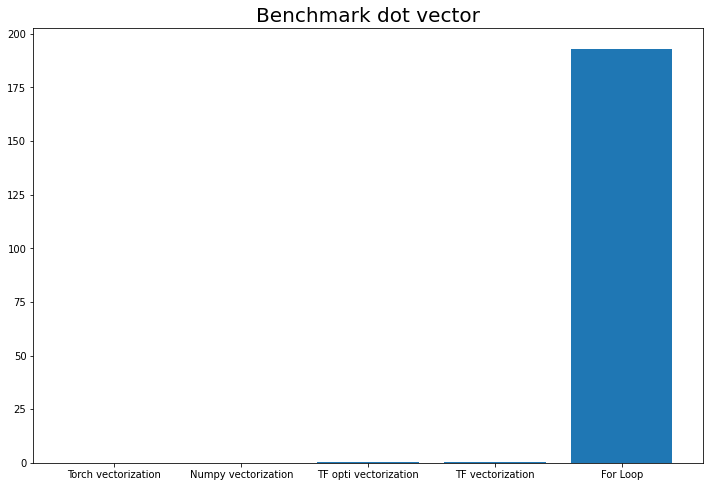

In [79]:
fig = plt.figure(figsize=(12, 8))
plt.bar(df_time.index.values, df_time['Time (ms)'].values)
plt.title('Benchmark dot vector', size=20)
plt.show();

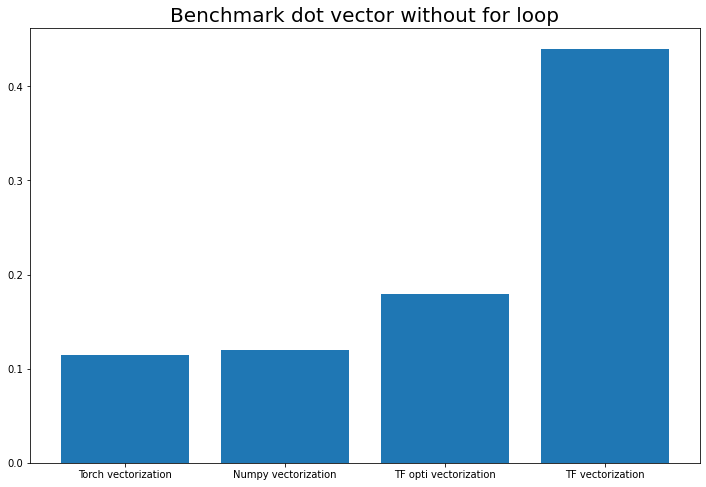

In [81]:
fig = plt.figure(figsize=(12, 8))
plt.bar(df_time.index.values[:-1], df_time['Time (ms)'].values[:-1])
plt.title('Benchmark dot vector without for loop', size=20)
plt.show();

<img src="img/tensor_vec.jpg" alt="drawing"/>